In [1]:
import sys
import os
import glob
import keras
import matplotlib.pyplot as plt
from skimage import transform,io
from skimage.filters import threshold_mean
import numpy as np
import keras

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
sys.path.append('../data')

In [4]:
DATA_PATH = '../data/'
IMG_PATH = os.path.join(DATA_PATH, "extracted_images")
SYMBOL_LIST_PATH = os.path.join(DATA_PATH, "handwritten_math_symbols")

In [5]:
TARGET_IMAGE_SIZE = (32,32)

In [6]:
with open(SYMBOL_LIST_PATH) as f:
    symbols_list = f.read().split("\n")
num_classes = len(symbols_list)

In [7]:
print(symbols_list)

['=', '-', ',', '!', '(', ')', '[', ']', '{', '}', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'alpha', 'ascii_124', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '']


In [8]:
def read_image(image_path):
    # read
    im = io.imread(image_path)
        
    # resize
    im = transform.resize(im, TARGET_IMAGE_SIZE, mode='symmetric', preserve_range=True)
    
    # threashold to convert it to binary
    thresh = threshold_mean(im)
    binary = im > thresh

    # binary conversion
    binary[binary == True] = 1
    binary[binary == False] = 0
    
    return binary

In [9]:
img = read_image('../data/extracted_images/5/5_100069.jpg')
img = img.reshape((1,32,32,1))
img

/home/aditya16217/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


array([[[[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        ..., 
        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]],

        [[ True],
         [ True],
         [ True],
         ..., 
         [ True],
         [ True],
         [ True]]]], dtype=bool)

In [10]:
X = [] 
Y = []

for i in range(len(symbols_list)):
    for a_img_path in glob.glob(os.path.join(IMG_PATH, symbols_list[i]) + "/*.jpg"):
        
        # read
        im = io.imread(a_img_path)
        
        # resize
        im = transform.resize(im, TARGET_IMAGE_SIZE, mode='symmetric', preserve_range=True)
        
        # threashold to convert it to binary
        thresh = threshold_mean(im)
        binary = im > thresh
        
        # binary conversion
        binary[binary == True] = 1
        binary[binary == False] = 0
        
        X.append(binary)
        Y.append(i)

/home/aditya16217/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [11]:
len(X)

375974

In [12]:
Y = keras.utils.to_categorical(Y, num_classes)

In [13]:
X = np.array(X)
Y = np.array(Y)

In [14]:
# resized
X = X.reshape((len(X),32, 32))

In [12]:
X, Y = shuffle(X, Y, random_state=23)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=46, shuffle=True, stratify=Y)

In [14]:
print("X_train " + str(X_train.shape))
print("X_test " + str(X_test.shape))

X_train (263181, 32, 32)
X_test (112793, 32, 32)


In [15]:
def get_class_weight(y):
    """

    Used from: https://stackoverflow.com/a/50695814
    TODO: check validity and 'balanced' option
    :param y: A list of one-hot-encoding labels [[0,0,1,0],[0,0,0,1],..]
    :return: class-weights to be used by keras model.fit(.. class_weight="") -> {0:0.52134, 1:1.adas..}
    """
    y_integers = np.argmax(y, axis=1)
    class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
    d_class_weights = dict(enumerate(class_weights))
    return d_class_weights
class_weights = get_class_weight(Y)

In [16]:
class_weights

{0: 0.34989688495786059,
 1: 0.13486627586221739,
 2: 2.4055869782202546,
 3: 3.5269606003752347,
 4: 0.32076736955980167,
 5: 0.31940430376090595,
 6: 5.8933788952285413,
 7: 5.8782676672920573,
 8: 12.194278671510119,
 9: 12.161933104742188,
 10: 0.18258397501146084,
 11: 0.66315429280992255,
 12: 0.17289022550858993,
 13: 0.17539683946627155,
 14: 0.42029964070838804,
 15: 0.61993628724821592,
 16: 1.2933847053562213,
 17: 1.4705095511506752,
 18: 1.5761597732855981,
 19: 1.4944748306674722,
 20: 1.2269330426780318,
 21: 0.37074866826941094,
 22: 1.8008832602073075,
 23: 3.4242335925973149,
 24: 0.53000217090368795,
 25: 2.2642216199939775,
 26: 0.79025315072178648,
 27: 1.5355153317105843,
 28: 0.94498119960589544,
 29: 33.467509346626315,
 30: 5.2823142632347979,
 31: 1.5268227707252098,
 32: 218.33565621370499,
 33: 1.2351963309503784,
 34: 101.889972899729,
 35: 23.040446133104545,
 36: 2.7098397047800264,
 37: 11.210388216351602,
 38: 6.6162320064759088,
 39: 17.771506901115522

In [17]:
# plt.imshow(X[90000]) 

In [19]:
for i in range(0,83):
    if Y[90000][i] == 1:
        wow = i
        break
symbols_list[wow]

'T'

In [20]:
# Model

In [17]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import backend as  K

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(TARGET_IMAGE_SIZE[0],TARGET_IMAGE_SIZE[1],1)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [21]:
# X_train = format_train_for_keras_fit(X_train)
# X_test = format_train_for_keras_fit(X_test)

In [20]:
X_train = X_train.reshape(len(X_train),32,32,1)
X_test = X_test.reshape(len(X_test),32,32,1)

NameError: name 'X_train' is not defined

In [23]:
checkpoints = ModelCheckpoint('../trained_models/model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [107]:
tbCallBack = TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)

In [108]:
history = model.fit(
                X_train,
                y_train,
                epochs=30,
                batch_size=128,
                validation_data=(X_test,y_test),
                callbacks= [checkpoints,tbCallBack],
                class_weight=class_weights
            )

Train on 263181 samples, validate on 112793 samples
Epoch 1/30
263181/263181 [==============================] - 42s 158us/step - loss: 1.5800 - acc: 0.5917 - val_loss: 0.5647 - val_acc: 0.8222
Epoch 2/30
263181/263181 [==============================] - 41s 154us/step - loss: 0.5834 - acc: 0.7917 - val_loss: 0.4083 - val_acc: 0.8541
Epoch 3/30
263181/263181 [==============================] - 41s 154us/step - loss: 0.4322 - acc: 0.8278 - val_loss: 0.3617 - val_acc: 0.8712
Epoch 4/30
263181/263181 [==============================] - 41s 154us/step - loss: 0.3493 - acc: 0.8487 - val_loss: 0.2916 - val_acc: 0.8963
Epoch 5/30
263181/263181 [==============================] - 40s 153us/step - loss: 0.3126 - acc: 0.8613 - val_loss: 0.2698 - val_acc: 0.8998
Epoch 6/30
263181/263181 [==============================] - 41s 154us/step - loss: 0.2749 - acc: 0.8700 - val_loss: 0.2467 - val_acc: 0.9071
Epoch 7/30
263181/263181 [==============================] - 40s 153us/step - loss: 0.2451 - acc: 0.878

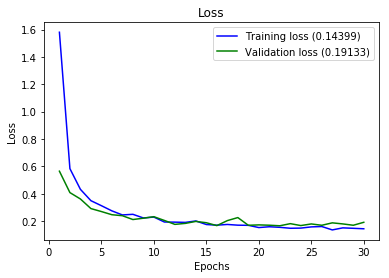

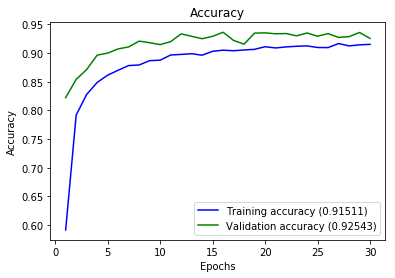

In [109]:
plot_history(history)

In [10]:
model.load_weights('../trained_models/model-epoch:16-acc:0.905-val_acc0.936.hdf5')

In [11]:
y_pred = model.predict_classes(X_test, batch_size=128, verbose=2)

NameError: name 'X_test' is not defined

In [29]:
y_pred = keras.utils.to_categorical(y_pred, num_classes)

In [30]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3897
          1       0.99      1.00      0.99     10123
          2       0.50      0.50      0.50       579
          3       1.00      0.99      1.00       393
          4       0.96      0.92      0.94      4490
          5       0.94      0.97      0.95      4153
          6       0.99      0.92      0.95       250
          7       1.00      0.93      0.96       251
          8       0.99      0.96      0.97       117
          9       1.00      0.95      0.97       119
         10       0.98      1.00      0.99      7426
         11       0.96      0.99      0.97      2012
         12       0.63      0.98      0.76      5121
         13       0.95      0.99      0.97      7535
         14       1.00      1.00      1.00      3269
         15       0.99      0.99      0.99      2220
         16       0.89      1.00      0.94       953
         17       0.98      0.98      0.98   

/home/aditya16217/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/aditya16217/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [64]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [104]:
activations = activation_model.predict(X_test[0:4].reshape(4, 32, 32, 1))

In [ ]:
for i in range(4):
    plt.imsave(str(i), X_test[0:4])

In [ ]:
symbols_list[np.argmax(y_test[1])]

In [ ]:
activations[1].shape

In [79]:
layer_activation = activations[6]

In [80]:
layer_activation.shape

(2, 15, 15, 64)

In [81]:
# layer_activation[4, :, :, 5]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


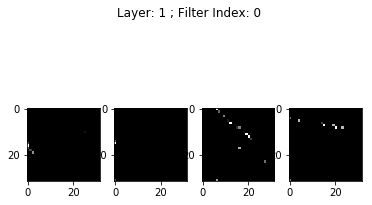

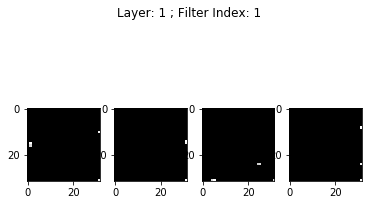

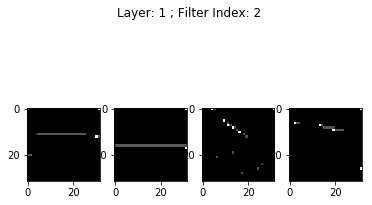

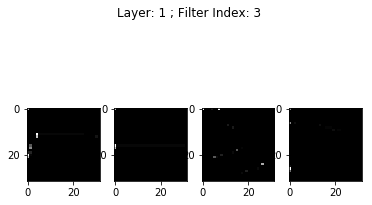

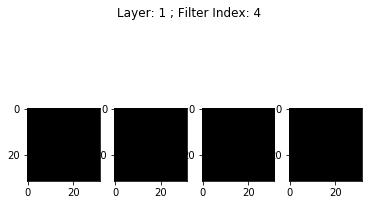

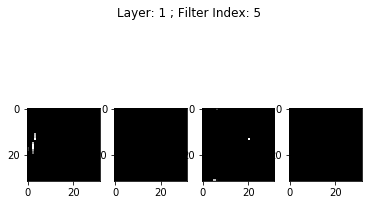

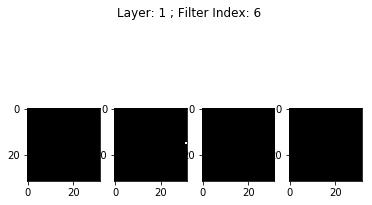

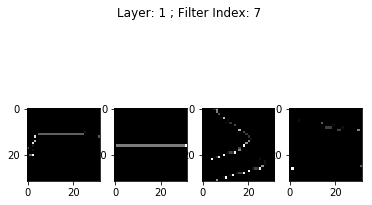

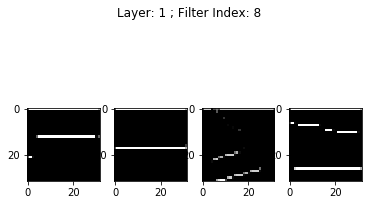

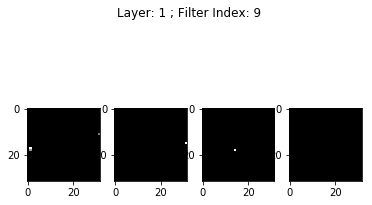

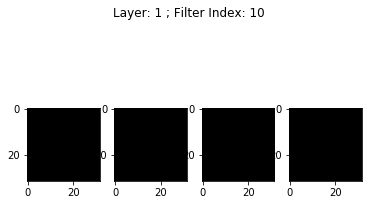

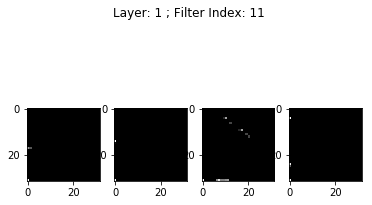

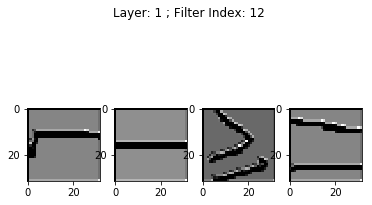

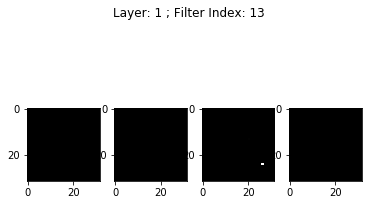

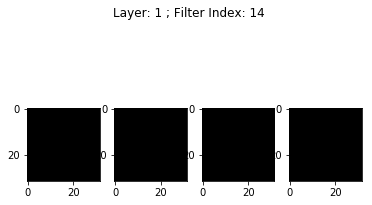

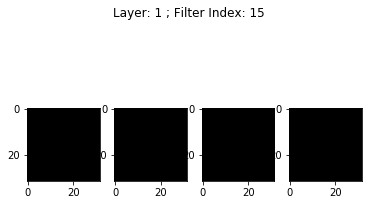

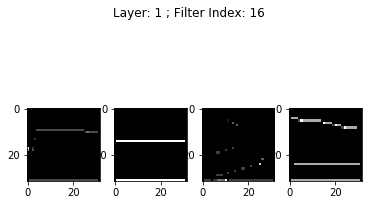

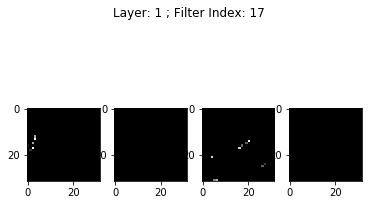

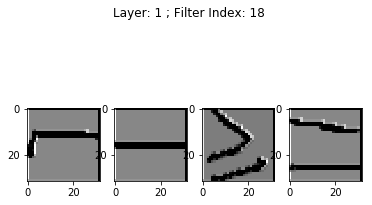

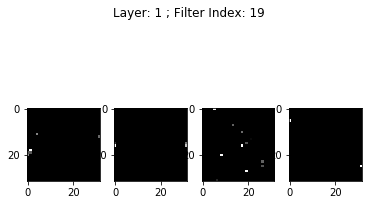

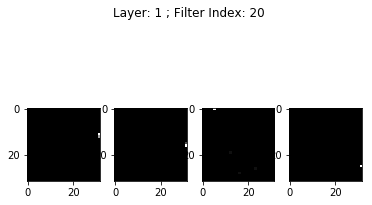

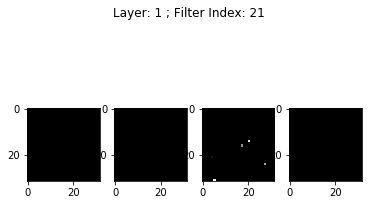

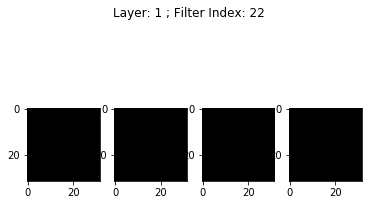

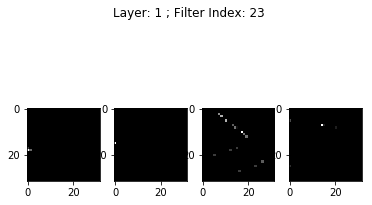

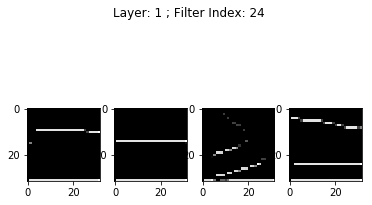

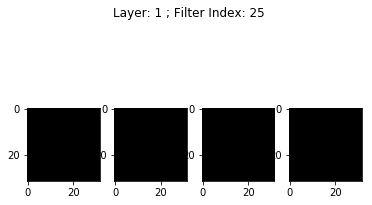

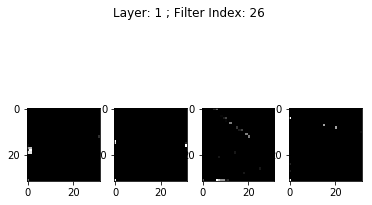

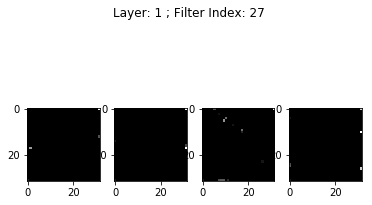

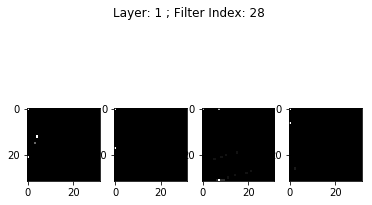

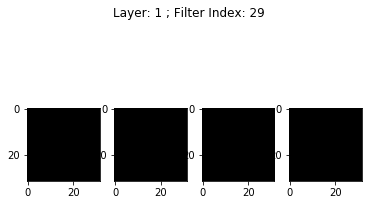

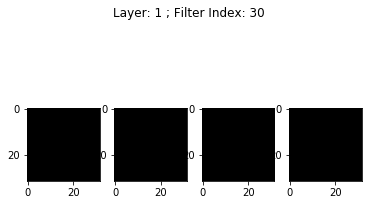

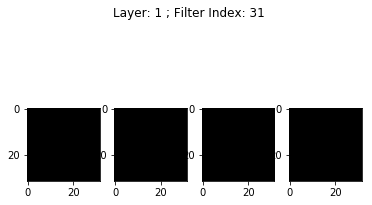

In [111]:
from_layer = 0
to_layer = 3
for layer_index in range(from_layer, to_layer):
    
    if "activation" not in model.layers[layer_index].name:
        continue
    
    layer_activation = activations[layer_index]
    
        
    if len(layer_activation.shape) != 4:
        continue

    from_filter = 0
    to_filter = layer_activation.shape[-1]
#     to_filter = 10
    
    for filter_index in range(from_filter, to_filter):
        no_images = layer_activation.shape[0]
        fig, ax = plt.subplots(1, no_images)
        fig.suptitle("Layer: " + str(layer_index) + " ; Filter Index: " + str(filter_index))
        for img_index in range(no_images):
            img_to_be_plotted = layer_activation[img_index, :, :, filter_index]
            ax[img_index].imshow(img_to_be_plotted, cmap='gray')
        fig.savefig("Layer: " + str(layer_index) + " ; Filter Index: " + str(filter_index) + ".png" )

In [ ]:
### class VisualiseCNN(object):
    def __init__(self, model):
        self.model = model
        layer_outputs = [layer.output for layer in model.layers]
        self.activation_model = Model(inputs=model.input, outputs=layer_outputs)

    def visualise(self, X, from_layer=0, till_layer=4):
        self.X = X
        self.activations = self.activation_model.predict(X.reshape(1,32,32,1))
        for i in range(from_layer, till_layer):
            if "Activation" in str(self.model.layers[i]):
                print(self.model.layers[i])
                self.display_activation(5, 5, i,self.model.layers[i].name)
                print("-------------------")
                print()

    def display_activation(self, col_size, row_size, act_index, name=""):
        activation = self.activations[act_index]
        activation_index = 0
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
        plt.title(name)
        for row in range(0, row_size):
            for col in range(0, col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1

-------------------

-------------------

-------------------



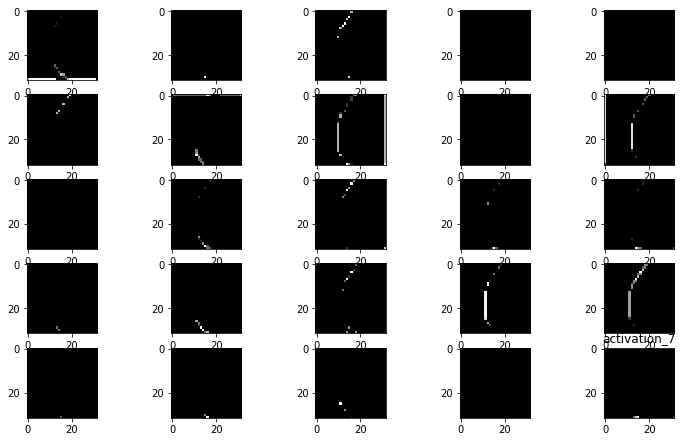

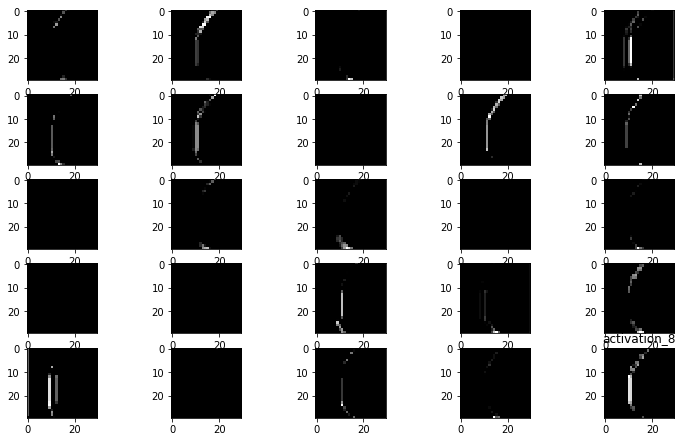

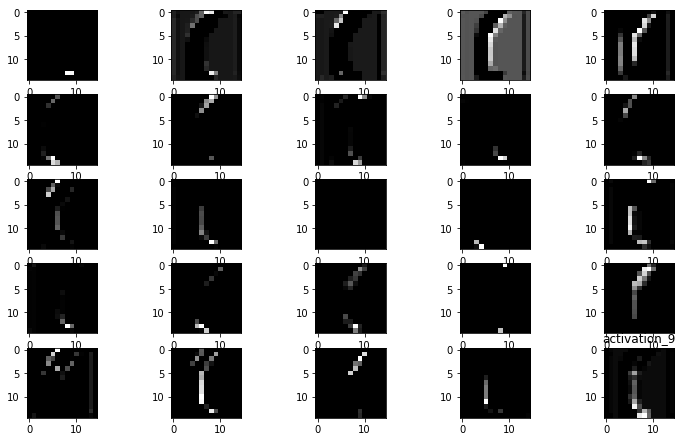

In [81]:
vis = VisualiseCNN(model)
vis.visualise(X[4], till_layer=8)

-------------------

-------------------

-------------------



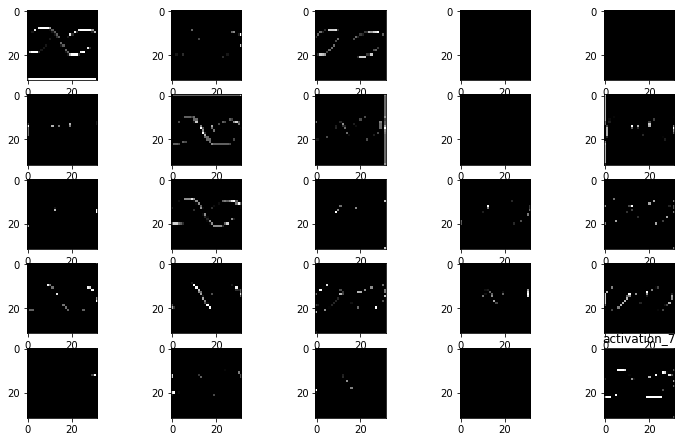

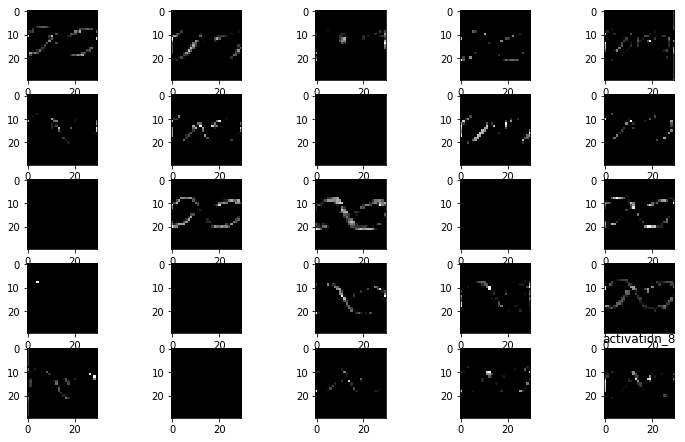

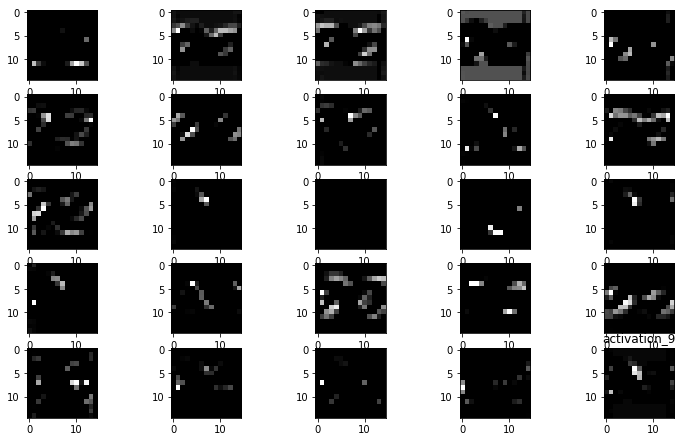

In [82]:
vis.visualise(X[5], till_layer=8)

-------------------

-------------------

-------------------



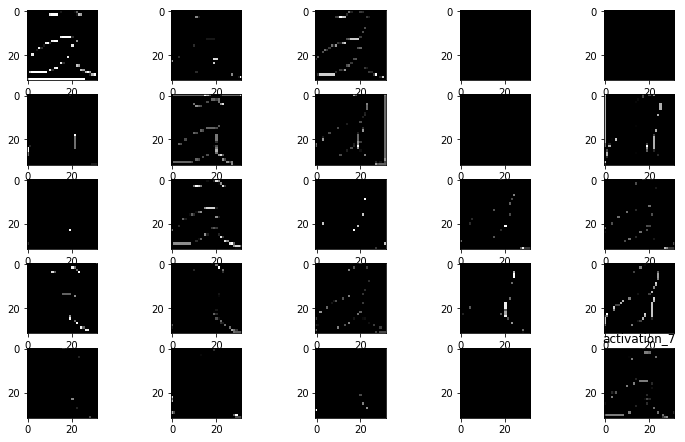

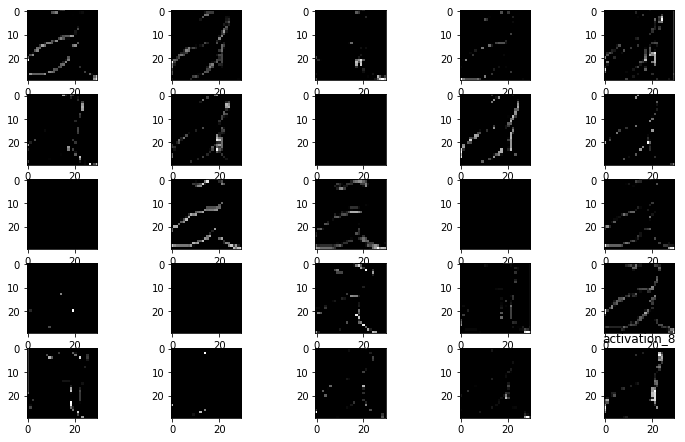

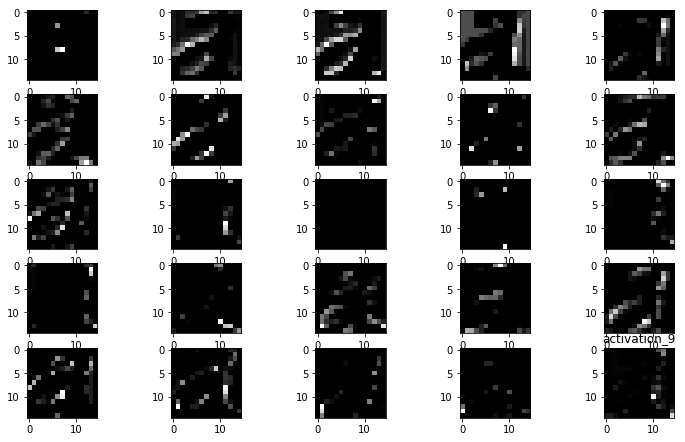

In [83]:
vis.visualise(X[6], till_layer=8)

-------------------

-------------------

-------------------



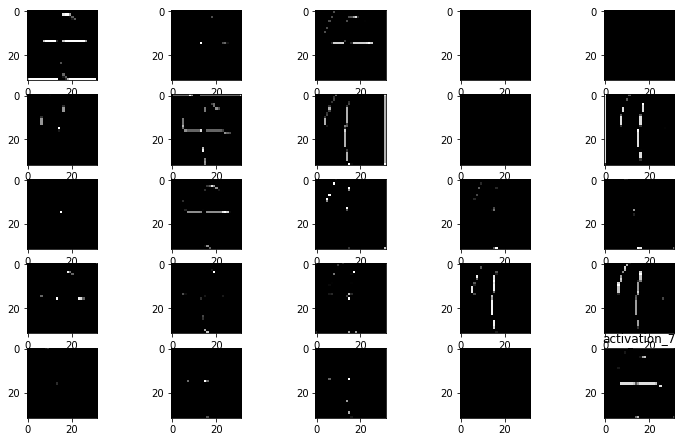

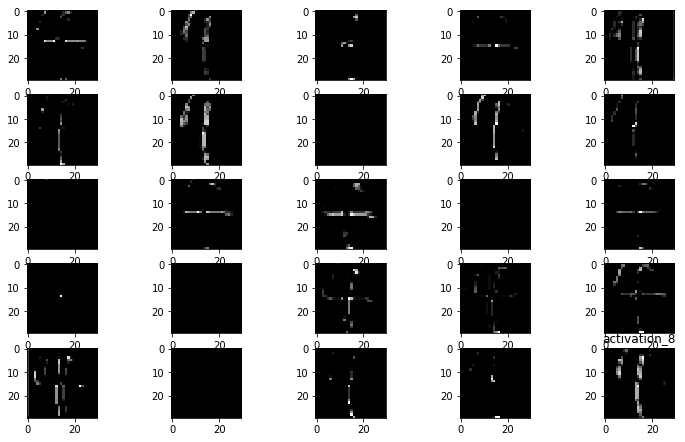

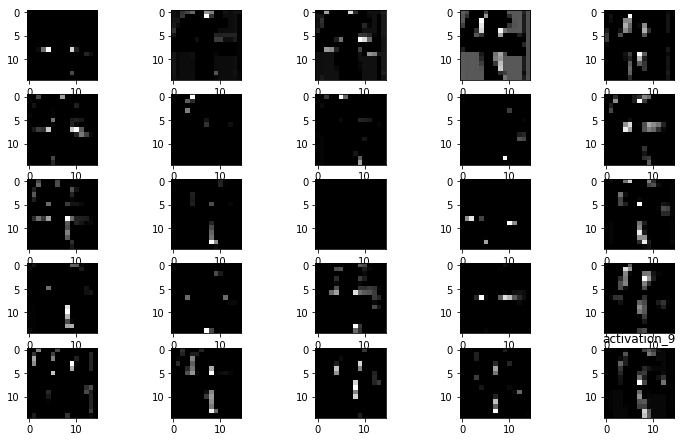

In [84]:
vis.visualise(X[7], till_layer=8)

-------------------

-------------------

-------------------



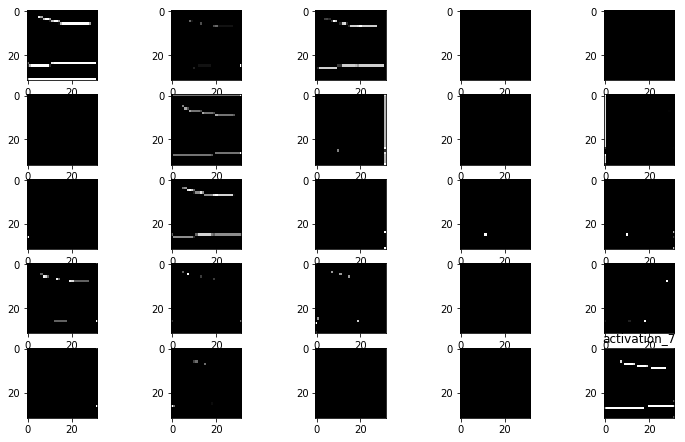

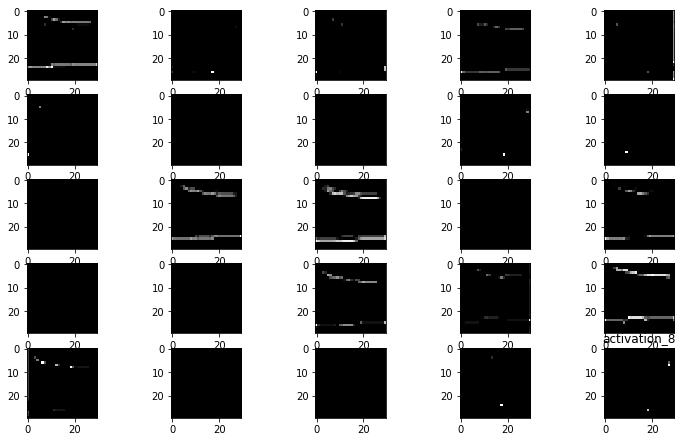

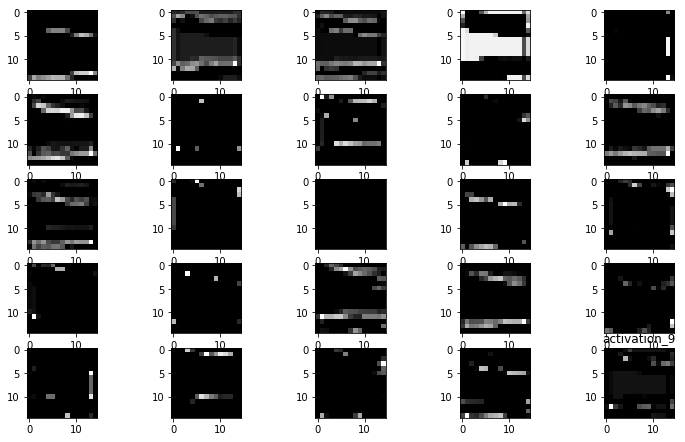

In [85]:
vis.visualise(X[8], till_layer=8)

In [37]:
import time 

layer_name = 'conv2d_2'
img_width = 32
img_height = 32

# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


kept_filters = []
for filter_index in range(32):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    p[=][]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 1, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 1))
#     input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))


Processing filter 0
Current loss value: -0.0197006
Filter 0 processed in 0s
Processing filter 1
Current loss value: -0.0370027
Filter 1 processed in 0s
Processing filter 2
Current loss value: -0.00300419
Filter 2 processed in 0s
Processing filter 3
Current loss value: -0.0509424
Filter 3 processed in 0s
Processing filter 4
Current loss value: 0.00853948
Current loss value: -0.916755
Filter 4 processed in 0s
Processing filter 5
Current loss value: -0.00558099
Filter 5 processed in 0s
Processing filter 6
Current loss value: -0.013084
Filter 6 processed in 0s
Processing filter 7
Current loss value: -0.103694
Filter 7 processed in 0s
Processing filter 8
Current loss value: -0.0722487
Filter 8 processed in 0s
Processing filter 9
Current loss value: -0.080564
Filter 9 processed in 0s
Processing filter 10
Current loss value: -0.0503788
Filter 10 processed in 0s
Processing filter 11
Current loss value: -0.0145734
Filter 11 processed in 0s
Processing filter 12
Current loss value: -0.00664947
Fi

In [29]:
# we will stich the best 64 filters on a 8 x 8 grid.
n = 8

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
width = n * img_width + (n - 1) * 1
height = n * img_height + (n - 1) * 1
stitched_filters = np.zeros((width, height, 1))

IndexError: list index out of range

In [41]:
kept_filters[1][1]

-0.037002668

In [ ]:
# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        width_margin = (img_width + margin) * i
        height_margin = (img_height + margin) * j
        stitched_filters[
            width_margin: width_margin + img_width,
            height_margin: height_margin + img_height, :] = img

# save the result to disk
save_img('stitched_filters_%dx%d.png' % (n, n), stitched_filters)

In [11]:
def f(img):
    img[img>0]=1
    return img

datagen = ImageDataGenerator(
    preprocessing_function=f
)

In [13]:

train_generator = datagen.flow_from_directory(
        IMG_PATH,
        classes=symbols_list,
        color_mode='grayscale',
        target_size=TARGET_IMAGE_SIZE,
        batch_size=64
)


Found 751948 images belonging to 83 classes.


KeyboardInterrupt: 

In [64]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch = 751948 // BATCH_SIZE,
#         epochs=10
# )

In [54]:
def format_train_for_keras_fit(_X):
     return np.transpose(_X.reshape(len(_X), TARGET_IMAGE_SIZE[0], TARGET_IMAGE_SIZE[1], 1), axes=[0,2,1,3])

In [261]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [262]:
layer_dict

{'activation_67': <keras.layers.core.Activation at 0x7efb198aae80>,
 'activation_68': <keras.layers.core.Activation at 0x7efb198ac080>,
 'activation_69': <keras.layers.core.Activation at 0x7efb198a4e48>,
 'activation_70': <keras.layers.core.Activation at 0x7efb198befd0>,
 'activation_71': <keras.layers.core.Activation at 0x7efb198192b0>,
 'activation_72': <keras.layers.core.Activation at 0x7efb197cdd68>,
 'conv2d_49': <keras.layers.convolutional.Conv2D at 0x7efb198aae10>,
 'conv2d_50': <keras.layers.convolutional.Conv2D at 0x7efb198ac320>,
 'conv2d_51': <keras.layers.convolutional.Conv2D at 0x7efb198a4470>,
 'conv2d_52': <keras.layers.convolutional.Conv2D at 0x7efb198bef28>,
 'dense_23': <keras.layers.core.Dense at 0x7efb19883c18>,
 'dense_24': <keras.layers.core.Dense at 0x7efb19819240>,
 'dropout_34': <keras.layers.core.Dropout at 0x7efb198a4048>,
 'dropout_35': <keras.layers.core.Dropout at 0x7efb1986dba8>,
 'dropout_36': <keras.layers.core.Dropout at 0x7efb197cd438>,
 'flatten_12':

In [285]:
i_i = 60

In [286]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[i_i].reshape(1,32,32,1))

 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in ran1ge(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

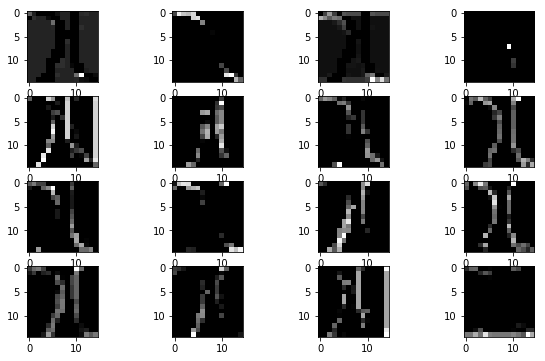

In [287]:
display_activation(activations,10,10,5)

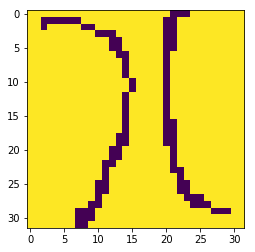

In [289]:
plt.imshow(X_train[i_i].reshape(32,32))

# MLP

In [50]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [61]:
model = Sequential()
model.add(Dense(768, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 768)               787200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               393728    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 83)                42579     
Total params: 1,223,507
Trainable params: 1,223,507
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
checkpoints = ModelCheckpoint('../trained_models/mlp_model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [70]:
history = model.fit(
                X_train,
                y_train,
                epochs=15,
                batch_size=128,
                validation_data=(X_test,y_test),
                callbacks= [checkpoints]
            )

Train on 263181 samples, validate on 112793 samples
Epoch 1/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4560 - acc: 0.8624 - val_loss: 0.2764 - val_acc: 0.9184

Epoch 00001: val_acc improved from 0.91255 to 0.91840, saving model to ../trained_models/mlp_model-epoch:01-acc:0.862-val_acc0.918.hdf5
Epoch 2/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4444 - acc: 0.8656 - val_loss: 0.2688 - val_acc: 0.9182

Epoch 00002: val_acc did not improve from 0.91840
Epoch 3/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4400 - acc: 0.8666 - val_loss: 0.2628 - val_acc: 0.9197

Epoch 00003: val_acc improved from 0.91840 to 0.91971, saving model to ../trained_models/mlp_model-epoch:03-acc:0.867-val_acc0.920.hdf5
Epoch 4/15
263181/263181 [==============================] - 15s 56us/step - loss: 0.4340 - acc: 0.8685 - val_loss: 0.2766 - val_acc: 0.9171

Epoch 00004: val_acc did not improve from 0.91971
Epoch 5/15
2

In [35]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

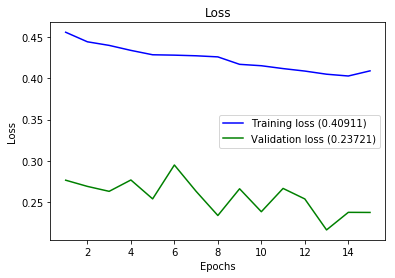

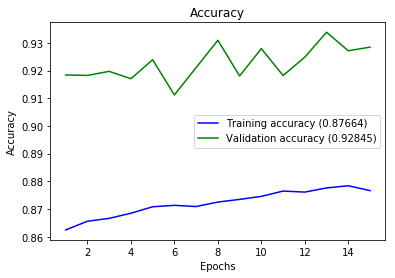

In [72]:
plot_history(history)

## Shallow CNN

In [81]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(TARGET_IMAGE_SIZE[0], TARGET_IMAGE_SIZE[1], 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [83]:
checkpoints = ModelCheckpoint('../trained_models/small_cnn_model-epoch:{epoch:02d}-acc:{acc:.3f}-val_acc{val_acc:.3f}.hdf5',
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True,
                              save_weights_only=True,
                              mode='max',
                              period=1)

In [84]:
history = model.fit(
                X_train,
                y_train,
                epochs=20,
                batch_size=128,
                validation_data=(X_test,y_test),
                callbacks= [checkpoints]
            )

Train on 263181 samples, validate on 112793 samples
Epoch 1/20
263181/263181 [==============================] - 38s 146us/step - loss: 1.0925 - acc: 0.7154 - val_loss: 0.3866 - val_acc: 0.8868

Epoch 00001: val_acc improved from -inf to 0.88677, saving model to ../trained_models/small_cnn_model-epoch:01-acc:0.715-val_acc0.887.hdf5
Epoch 2/20
263181/263181 [==============================] - 35s 133us/step - loss: 0.6349 - acc: 0.8178 - val_loss: 0.2811 - val_acc: 0.9188

Epoch 00002: val_acc improved from 0.88677 to 0.91878, saving model to ../trained_models/small_cnn_model-epoch:02-acc:0.818-val_acc0.919.hdf5
Epoch 3/20
263181/263181 [==============================] - 35s 133us/step - loss: 0.5286 - acc: 0.8441 - val_loss: 0.2320 - val_acc: 0.9316

Epoch 00003: val_acc improved from 0.91878 to 0.93163, saving model to ../trained_models/small_cnn_model-epoch:03-acc:0.844-val_acc0.932.hdf5
Epoch 4/20
263181/263181 [==============================] - 35s 133us/step - loss: 0.4610 - acc: 0.

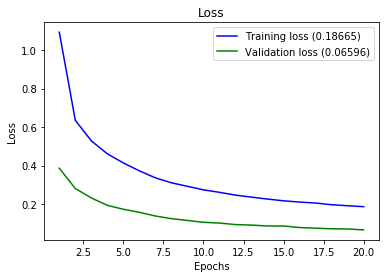

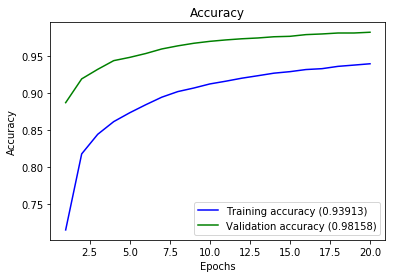

In [85]:
plot_history(history)